In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris
from collections import Counter

data=load_iris()

X=data['data']
y=data['target']

ss=StandardScaler()
X_scaled=ss.fit_transform(X)


<Axes: >

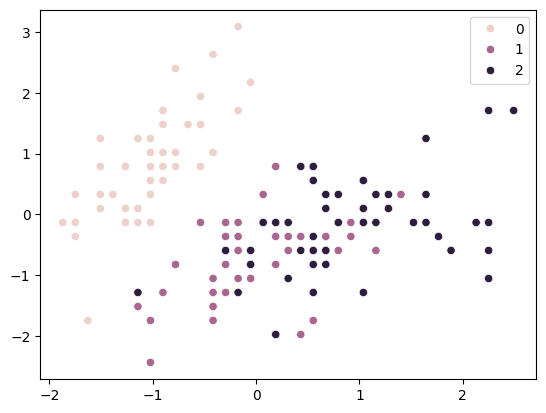

In [3]:
sns.scatterplot(x=X_scaled[:,0],y=X_scaled[:,1],hue=y)

In [4]:
class KNN():

    """
    K-Nearest Neighbors (KNN) classifier.

    Input:
        X : Feature matrix where each row represents a data point.
        y : Labels corresponding to the data points.
        k : The number of nearest neighbors to consider for classification.


    Output:
    list: Predicted labels for each data point in X.
    """


    def __init__(self,X,y,k):
        self.X=X
        self.y=y
        self.n=len(X)
        self.k=k


    @staticmethod
    def distance(p_a,p_b):
        return np.linalg.norm(p_a-p_b)

    def find_neighbors(self,point):
    
        dist=[]
        for d in self.X:
                dist.append(KNN.distance(point,d))
        dist=np.array(dist)
        dist=np.argsort(dist)[0:self.k]

        return dist


    def main(self):
        preds=[]
        for point in self.X:
            # find the nearest neighbors
            idx_neighbors=self.find_neighbors(point)
            y_neighbors=self.y[idx_neighbors]
            y_neighbor_count=Counter(y_neighbors)
            y_neighbor_count=sorted(y_neighbor_count.items(),key=lambda x:x[1],reverse=True)
            y_neighbor_majority= y_neighbor_count[0][0]
            preds.append(y_neighbor_majority)

        return preds







In [5]:
knn=KNN(X_scaled,y,4)
preds=knn.main()

In [6]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y,preds))

0.9733333333333334


<Axes: >

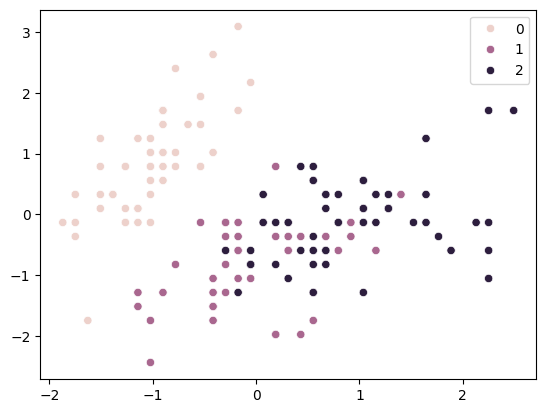

In [7]:
sns.scatterplot(x=X_scaled[:,0],y=X_scaled[:,1],hue=preds)